# Web scraping in Python
### by [Jason DeBacker](http://jasondebacker.com), October 2017

This notebook provides a tutorial and examples showing how to scrape webpages with Python in order to gather data.

## Beautiful Soup

There are a number of Python packages that are useful for web scraping, but we'll use [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/).  This may be the most used package for general web scraping and it allows a lot of flexibility.

Beautiful Soup helps you to gather data by parsing HTML and XML code and returning a "soup" object.  The soup object has all of the data in the HTML/XML code that was parsed, but now with some additional structure that allows you to easily pull out particular components of the HTML/XML such as a title, table, image, etc.

Below, we'll apply Beautiful Soup to several examples that illustrate how to pull data from webpages with different structures. 

## Example 1: Wikipedia

Let's scrape the season schedule and results for the 1980 Georgia Bulldogs football team from Wikipedia.  The page can be found [here](https://en.wikipedia.org/wiki/1980_Georgia_Bulldogs_football_team).  What we are interested in is this table:

![1980 Georgia Bulldogs Schedule](files/images/UGA1980results.png)


In [ ]:
# import packages
from bs4 import BeautifulSoup
import urllib.request

# give URL and header
wiki = "https://en.wikipedia.org/wiki/1980_Georgia_Bulldogs_football_team"
header = {'User-Agent': 'Mozilla/5.0'} #Needed to prevent 403 error on Wikipedia

# Make the request to get served the webpage, "soupify" it
req = urllib.request.Request(wiki, headers=header)
page = urllib.request.urlopen(req)
soup = BeautifulSoup(page, 'lxml')
 
# what does the soup object contain
print(soup.prettify())
# print(page)

In [ ]:
# extract the table by pulling information from the wikitable class
# There's only one table like this here, so that makes it easier
table = soup.find("table", {"class": "wikitable"})
print(table)

In [22]:
# create a dictionary in which to store data
# the keys will be the column names, the values lists
# containing the element in each row in that column
uga_1980 = {'date': [], 'opponent': [], 'rank': [], 'site': [],
            'tv': [], 'result': [], 'attendance': []}

# iterate through the table, pulling out each row
for row in table.findAll("tr"):
    cells = row.findAll("td")
    #For each "tr", assign each "td" to a variable.
    if len(cells) == 7:
        uga_1980['date'].append(cells[0].find(text=True))
        uga_1980['opponent'].append(cells[1].findAll(text=True))
        uga_1980['rank'].append(cells[2].find(text=True))
        uga_1980['site'].append(cells[3].findAll(text=True))
        uga_1980['tv'].append(cells[4].find(text=True))
        uga_1980['result'].append(cells[5].find(text=True))
        uga_1980['attendance'].append(cells[6].find(text=True))

In [23]:
# Look at this dictionary
uga_1980

{'attendance': ['95,288',
  '60,150',
  '61,800',
  '59,200',
  '60,300',
  '59,300',
  '57,239',
  '62,200',
  '68,528',
  '74,900',
  '62,800',
  '77,896'],
 'date': ['September 6',
  'September 13',
  'September 20',
  'September 27',
  'October 11',
  'October 18',
  'October 25',
  'November 1',
  'November 8',
  'November 15',
  'November 29',
  'January 1'],
 'opponent': [['at\xa0', 'Tennessee'],
  ['Texas A&M', '*'],
  ['Clemson', '*'],
  ['TCU', '*'],
  ['Ole Miss'],
  ['Vanderbilt'],
  ['at\xa0', 'Kentucky'],
  ['No. 14\xa0', 'South Carolina', '*'],
  ['vs.\xa0No. 20\xa0', 'Florida'],
  ['at\xa0', 'Auburn'],
  ['Georgia Tech', '*'],
  ['vs.\xa0No. 7\xa0', 'Notre Dame', '*']],
 'rank': ['No. 16',
  'No. 12',
  'No. 10',
  'No. 10',
  'No. 6',
  'No. 6',
  'No. 5',
  'No. 4',
  'No. 2',
  'No. 1',
  'No. 1',
  'No. 1'],
 'result': ['W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W', 'W'],
 'site': [['Neyland Stadium', ' • ', 'Knoxville, TN', ' (', 'Rivalry', ')'],
  ['Sanfor

In [24]:
# put this in a dataframe and format it
import pandas as pd

uga_1980_df = pd.DataFrame(uga_1980)
uga_1980_df

,attendance,date,opponent,rank,result,site,tv
0,"95,288",September 6,"[at , Tennessee]",No. 16,W,"[Neyland Stadium, • , Knoxville, TN, (, Riva...",None
1,"60,150",September 13,"[Texas A&M, *]",No. 12,W,"[Sanford Stadium, • , Athens, GA]",None
2,"61,800",September 20,"[Clemson, *]",No. 10,W,"[Sanford Stadium • Athens, GA (, Rivalry, )]",None
3,"59,200",September 27,"[TCU, *]",No. 10,W,"[Sanford Stadium • Athens, GA]",None
4,"60,300",October 11,[Ole Miss],No. 6,W,"[Sanford Stadium • Athens, GA]",None
5,"59,300",October 18,[Vanderbilt],No. 6,W,"[Sanford Stadium • Athens, GA (, Rivalry, )]",None
6,"57,239",October 25,"[at , Kentucky]",No. 5,W,"[Commonwealth Stadium, • , Lexington, KY]",None
7,"62,200",November 1,"[No. 14 , South Carolina, *]",No. 4,W,"[Sanford Stadium • Athens, GA (, Rivalry, )]",ABC
8,"68,528",November 8,"[vs. No. 20 , Florida]",No. 2,W,"[Gator Bowl Stadium, • , Jacksonville, FL, (...",ABC
9,"74,900",November 15,"[at , Auburn]",No. 1,W,"[Jordan–Hare Stadium, • , Auburn, AL, (, Dee...",None


From here, we can reformat the dates and numeric values into approproriate types as well as change some of text to drop characters like "[".  This will just be working with DataFrames and Python's types.

Instead of this, let's think about how to gather more data.  Sticking with this example, let's try to gather all tof the results for Georgia Football from 1980 to 2016.  

Start by looking for patterns in how the data is presented.  The url for the 1980 season is `https://en.wikipedia.org/wiki/1980_Georgia_Bulldogs_football_team`, for the 1981 season: `https://en.wikipedia.org/wiki/1981_Georgia_Bulldogs_football_team`, and for the 2016 season: `https://en.wikipedia.org/wiki/2016_Georgia_Bulldogs_football_team`.  So we can see the pattern in how the url updates.  This will help us as we scrape multiple years of data.

Lookig at each of these pages, we notice some differences.  For example, there are more tables on the page for the 2016 season than for the 1980 season.  So there may be some work we have to do here, but lets' start out by trying to loop over all the seasons, doing what we did above.

In [28]:
# create empty dataframe
uga_df = pd.DataFrame(columns=['date', 'opponent', 'rank',
                               'site', 'tv', 'result', 'attendance', 'year'])

# create a dictionary in which to store data
# the keys will be the column names, the values lists
# containing the element in each row in that column
results_dict = {'date': [], 'opponent': [], 'rank': [], 'site': [],
                'tv': [], 'result': [], 'attendance': [], 'year': []}

# Loop over years
for year in range(1980, 2016):
    # give URL and header
    wiki = "https://en.wikipedia.org/wiki/" + str(year) + "_Georgia_Bulldogs_football_team"
    header = {'User-Agent': 'Mozilla/5.0'} #Needed to prevent 403 error on Wikipedia

    # Make the request to get served the webpage, "soupify" it
    req = urllib.request.Request(wiki,headers=header)
    page = urllib.request.urlopen(req)
    soup = BeautifulSoup(page, 'lxml')

    # extract the table by pulling information from the wikitable class
    # There's only one table like this here, so that makes it easier
    table = soup.find("table", {"class": "wikitable"})

    # iterate through the table, pulling out each row
    for row in table.findAll("tr"):
        cells = row.findAll("td")
        #For each "tr", assign each "td" to a variable.
        if len(cells) == 7:
            results_dict['date'].append(cells[0].find(text=True))
            results_dict['opponent'].append(cells[1].findAll(text=True))
            results_dict['rank'].append(cells[2].find(text=True))
            results_dict['site'].append(cells[3].findAll(text=True))
            results_dict['tv'].append(cells[4].find(text=True))
            results_dict['result'].append(cells[5].find(text=True))
            results_dict['attendance'].append(cells[6].find(text=True))
            results_dict['year'].append(year)

    print('Year = ', year)

Year =  1980
Year =  1981
Year =  1982
Year =  1983
Year =  1984
Year =  1985
Year =  1986
Year =  1987
Year =  1988
Year =  1989
Year =  1990
Year =  1991
Year =  1992
Year =  1993
Year =  1994
Year =  1995
Year =  1996
Year =  1997
Year =  1998
Year =  1999
Year =  2000
Year =  2001
Year =  2002
Year =  2003
Year =  2004
Year =  2005
Year =  2006
Year =  2007
Year =  2008
Year =  2009
Year =  2010
Year =  2011
Year =  2012
Year =  2013
Year =  2014
Year =  2015


In [29]:
uga_df = pd.DataFrame(results_dict)
uga_df

,attendance,date,opponent,rank,result,site,tv,year
0,"95,288",September 6,"[at , Tennessee]",No. 16,W,"[Neyland Stadium, • , Knoxville, TN, (, Riva...",None,1980
1,"60,150",September 13,"[Texas A&M, *]",No. 12,W,"[Sanford Stadium, • , Athens, GA]",None,1980
2,"61,800",September 20,"[Clemson, *]",No. 10,W,"[Sanford Stadium • Athens, GA (, Rivalry, )]",None,1980
3,"59,200",September 27,"[TCU, *]",No. 10,W,"[Sanford Stadium • Athens, GA]",None,1980
4,"60,300",October 11,[Ole Miss],No. 6,W,"[Sanford Stadium • Athens, GA]",None,1980
5,"59,300",October 18,[Vanderbilt],No. 6,W,"[Sanford Stadium • Athens, GA (, Rivalry, )]",None,1980
6,"57,239",October 25,"[at , Kentucky]",No. 5,W,"[Commonwealth Stadium, • , Lexington, KY]",None,1980
7,"62,200",November 1,"[No. 14 , South Carolina, *]",No. 4,W,"[Sanford Stadium • Athens, GA (, Rivalry, )]",ABC,1980
8,"68,528",November 8,"[vs. No. 20 , Florida]",No. 2,W,"[Gator Bowl Stadium, • , Jacksonville, FL, (...",ABC,1980
9,"74,900",November 15,"[at , Auburn]",No. 1,W,"[Jordan–Hare Stadium, • , Auburn, AL, (, Dee...",None,1980


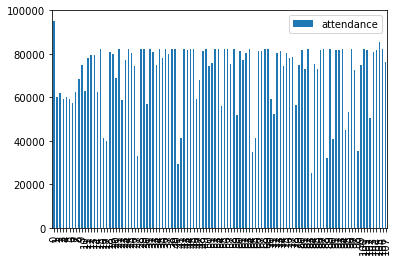

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 
uga_df['attendance'] = uga_df['attendance'].str.replace(",", "").astype(float) 
uga_df.plot(y='attendance', kind='bar')

## Example 2: Scraping Yellowpages.com

Here well grab information from a search of yellowpages.com

![YP.com Screenshot](files/images/YP_search.png)


In [ ]:
# import package
import requests

# give url for search of Columbia, SC restaurants
r = requests.get('https://www.yellowpages.com/search?search_terms=restaurant&geo_location_terms=Columbia%2C+SC')
r.content

# parse webpage with BS
soup = BeautifulSoup(r.content, 'lxml') #note - setting parser to lxml
yellowpages_data = soup.find_all("div", {"class":"info"})

yellowpages_data
# soup.prettify()
# len(yellowpages_data)

In [39]:
# print restaurant names
for item in yellowpages_data:
    try:
        print(item.contents[0].find_all("a",{"class":"business-name"})[0].text)
    except:
        pass

South Congaree House of Pizza & Family Restaurant
3 Credit Reports for $1
California Dreaming
Motor Supply Co Bistro
Flaming Grill & Supreme Buffet
Sato Japanese Restaurant
Miyabi Japanese Steakhouse And Sushi Bar
Olive Garden Italian Restaurant
Clifton Seafood
Olive Garden Italian Restaurant
Chinese American House
Rosso Trattoria Italia
Wing Zone
Original Pancake House The
Red Lobster
Carolina Catering
Nathan's Restaurant
Ruth's Chris Steak House
Oceanview Seafood Restaurant
Villa On Bush River
Lizard's Thicket
Golden Corral Restaurants
Tombo Grille
Gervais & Vine
Texas Roadhouse
Pawleys Front Porch
Beef 'O' Bradys
Bamboo House
Saki Tumi Grill & Sushi Bar
Mikino's Diner
Fazoli's
Takosushi
Red Lobster
Miyabi Japanese Steakhouse And Sushi Bar
Sato Japanese Restaurant
Flaming Grill & Supreme Buffet
Olive Garden Italian Restaurant
Maurice's Piggie Park BBQ
Hite's Bar-B-Que
South Congaree House of Pizza & Family Restaurant
Eggroll Station
Andy's Delicatessen Inc
DEVINE FOODS
Mediterranean 

Note that these are just results for one page and there are a number of pages of results.  We can get those others too.  To do that, let's determine the number of pages and go to each page.  

A first step is to note the format of the results of additional pages.  Here's the url of the first page:

`https://www.yellowpages.com/search?search_terms=restuarant&geo_location_terms=Columbia%2C+SC`

And the second:

`https://www.yellowpages.com/search?search_terms=restuarant&geo_location_terms=Columbia%2C%20SC&page=2`

We can see a pattern. Let's exploit this.

In [ ]:
soup

In [43]:
# import
import re

result_string = soup.find('div', attrs={'class': 'pagination'}).text

numResults = float((re.search('found(.*)results', result_string)).group(1))
print("Number of results : ", numResults)
pages = int(numResults/30) # checked results page to see that 30 displayed per page as default
print('Number of pages = ', pages)

Number of results :  1162.0
Number of pages =  38


In [44]:
# Now loop over pages of results
# Lots of them, so let's put in list and not print them all
restaurant_list = []
for i in range(1, pages+1):
    if i == 1:
        url = ('https://www.yellowpages.com/search?search_terms='+
                'restuarant&geo_location_terms=Columbia%2C+SC')
    else:
        url = ('https://www.yellowpages.com/search?search_terms='+
               'restuarant&geo_location_terms=Columbia%2C%20SC&page=' + str(i))
    r = requests.get(url)
    r.content

    # parse webpage with BS
    soup = BeautifulSoup(r.content, 'lxml') #note - setting parser to lxml
    yellowpages_data = soup.find_all("div", {"class":"info"})
    
    # append names to list
    for item in yellowpages_data:
        try:
            restaurant_list.append(item.contents[0].
                                   find_all("a",{"class":"business-name"})[0].text)
        except:
            pass
    print("Finished page ", i, " results")
    
print(len(restaurant_list))

Finished page  1  results
Finished page  2  results
Finished page  3  results
Finished page  4  results
Finished page  5  results
Finished page  6  results
Finished page  7  results
Finished page  8  results
Finished page  9  results
Finished page  10  results
Finished page  11  results
Finished page  12  results
Finished page  13  results
Finished page  14  results
Finished page  15  results
Finished page  16  results
Finished page  17  results
Finished page  18  results
Finished page  19  results
Finished page  20  results
Finished page  21  results
Finished page  22  results
Finished page  23  results
Finished page  24  results
Finished page  25  results
Finished page  26  results
Finished page  27  results
Finished page  28  results
Finished page  29  results
Finished page  30  results
Finished page  31  results
Finished page  32  results
Finished page  33  results
Finished page  34  results
Finished page  35  results
Finished page  36  results
Finished page  37  results
Finished p

In [45]:
restaurant_list[100:110]

['Fatz Cafe',
 "Alodia's Cucina Italiana",
 'Oyster Bar Columbia',
 'Travinia Italian Kitchen',
 'China One Chinese Restaurant',
 "Romano's Macaroni Grill",
 'Blue Marlin',
 'Persis Biryani Indian Grill',
 'Palmetto Seafood Company',
 'Big Boys Original Smokehouse']